# Data Preprocessing 
Start by importing the database from redivis

In [30]:
import redivis
import pandas as pd
import matplotlib.pyplot as plt

user = redivis.user("cdpdemo")
dataset = user.dataset("climate_change_earth_surface_temperature_data:1e0a:v1_0")
table = dataset.table("global_temperatures_by_major_city:7x6x")

# Load table as a dataframe
df = table.to_pandas_dataframe()
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1926-10-01,21.425,0.437,Cali,Colombia,4.02N,76.34W
1,1967-03-01,22.05,0.343,Cali,Colombia,4.02N,76.34W
2,1910-06-01,21.577,0.461,Cali,Colombia,4.02N,76.34W
3,1913-05-01,21.109,0.502,Cali,Colombia,4.02N,76.34W
4,1888-10-01,21.432,1.062,Cali,Colombia,4.02N,76.34W


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype               
---  ------                         --------------   -----               
 0   dt                             239177 non-null  date32[day][pyarrow]
 1   AverageTemperature             228175 non-null  double[pyarrow]     
 2   AverageTemperatureUncertainty  228175 non-null  double[pyarrow]     
 3   City                           239177 non-null  string[pyarrow]     
 4   Country                        239177 non-null  string[pyarrow]     
 5   Latitude                       239177 non-null  string[pyarrow]     
 6   Longitude                      239177 non-null  string[pyarrow]     
dtypes: date32[day][pyarrow](1), double[pyarrow](2), string[pyarrow](4)
memory usage: 14.2 MB


In [32]:
df.describe()

,dt,AverageTemperature,AverageTemperatureUncertainty
count,239177,228175.0,228175.0
mean,1910-11-09,18.125969,0.969343
min,1743-11-01,-26.772,0.04
25%,1864-02-01,12.71,0.34
50%,1914-02-01,20.428,0.592
75%,1963-12-01,25.918,1.32
max,2013-09-01,38.283,14.037
std,NaN,10.0248,0.979644


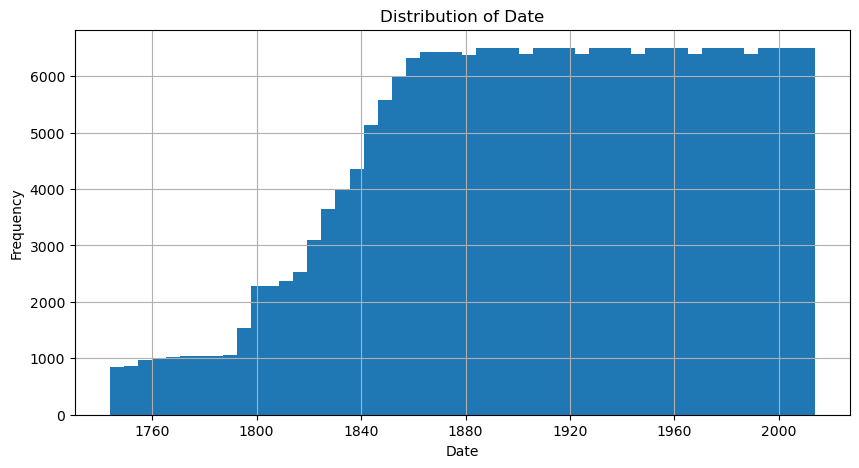

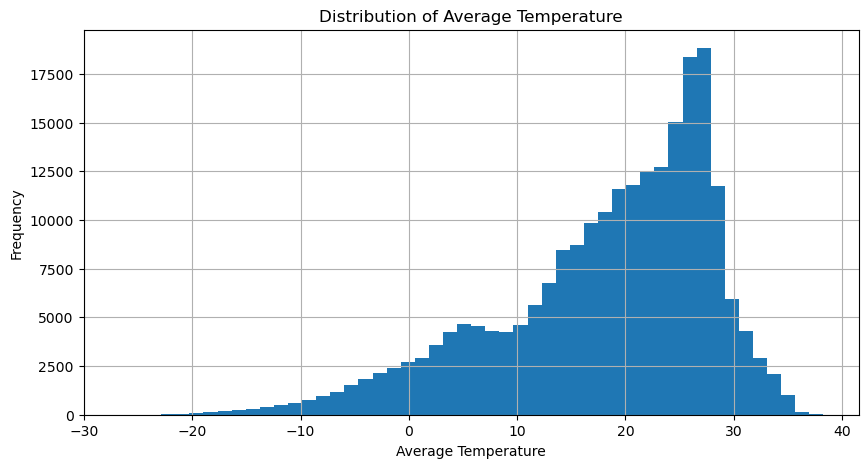

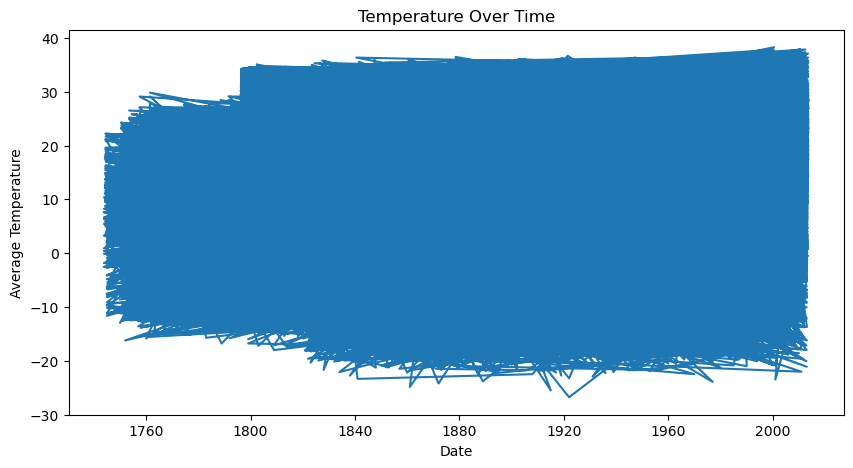

In [33]:
df['dt'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Date')
plt.show()

df['AverageTemperature'].hist(bins=50, figsize=(10, 5))
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.show()

# Time series visualization for temperatures over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['dt']), df['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Temperature Over Time')
plt.show()

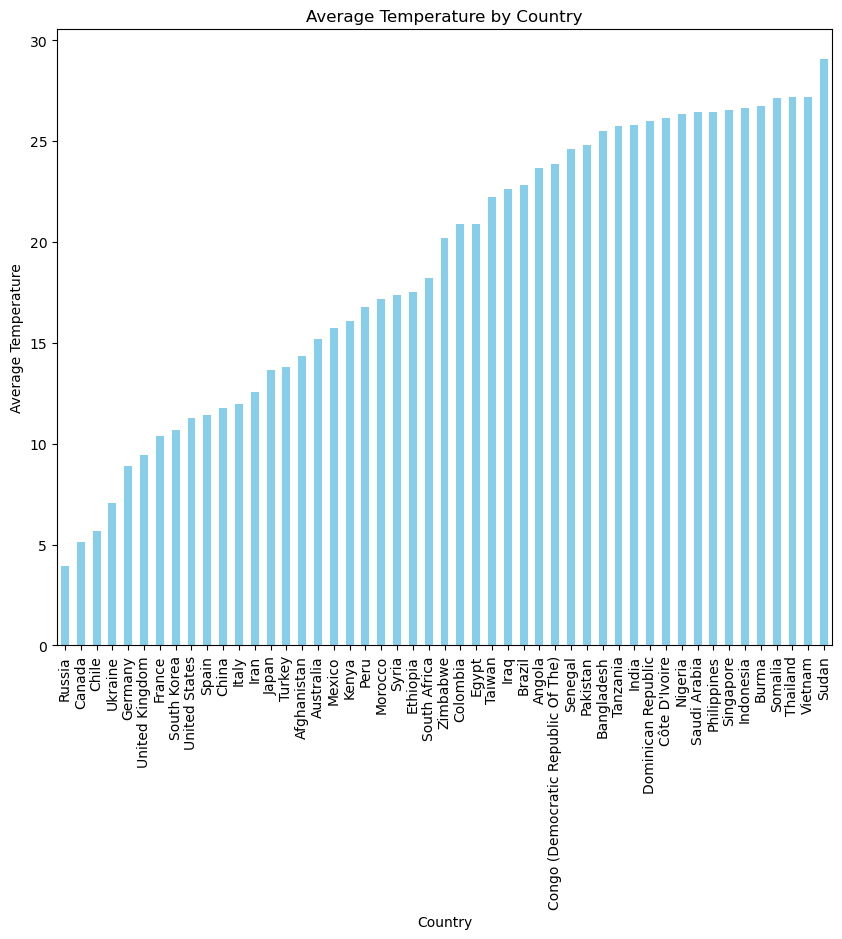

In [34]:
# Group data by country and calculate the mean temperature
country_temp = df.groupby('Country')['AverageTemperature'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(10, 8))
country_temp.plot(kind='bar', color='skyblue')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Country')
plt.xticks(rotation=90)
plt.show()

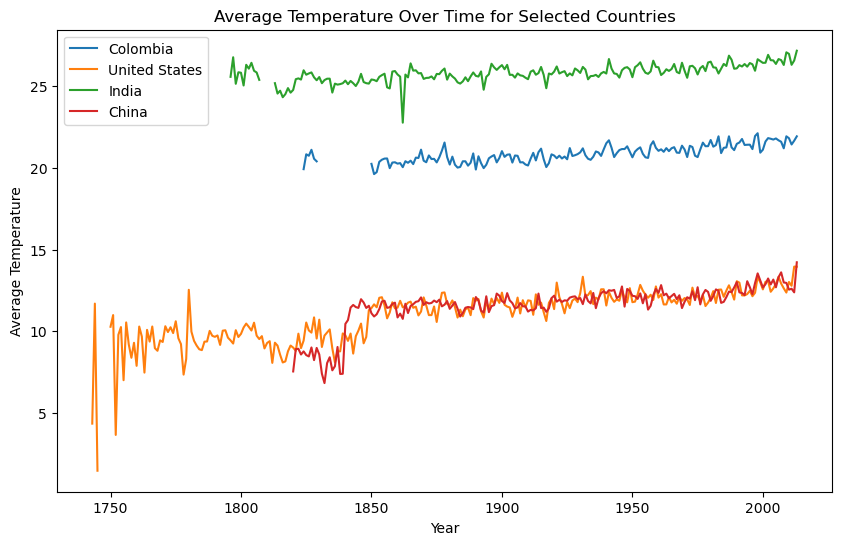

In [37]:
# Select a few countries to compare
selected_countries = ['Colombia', 'United States', 'India', 'China']  # Adjust with the countries you are interested in
df['dt'] = pd.to_datetime(df['dt'])  # Convert dt to datetime format
df['Year'] = df['dt'].dt.year  # Extract the year

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = df[df['Country'] == country].groupby('Year')['AverageTemperature'].mean()
    plt.plot(country_data.index, country_data.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time for Selected Countries')
plt.legend()
plt.show()
